## Facebook Prophet

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [5]:
# Load dataset
df = pd.read_csv("credit_card_transactions.csv")  # Replace with actual dataset path
df.head(2)

,cus_id,trans_date,cc_num,merchant,category,tran_amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,01/01/2019,2703186189652090,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",09/03/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,01/01/2019,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,21/06/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN


In [9]:
# 1. Prepare Data

# Convert Transaction_Date to datetime format
df['trans_date'] = pd.to_datetime(df['trans_date'], dayfirst=True)

# Aggregate transactions by day
daily_spending = df.groupby('trans_date')['tran_amt'].sum().reset_index()
daily_spending.columns = ['ds', 'y']  # Prophet requires 'ds' for date & 'y' for target

In [10]:
# 2. Train Model
model = Prophet()
model.fit(daily_spending)

# Create future dataframe (e.g., 90 days into the future)
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

20:33:41 - cmdstanpy - INFO - Chain [1] start processing
20:33:50 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
# 3. Evaluate Model Performance

# Calculate errors
y_true = daily_spending['y']  # Actual values
y_pred = forecast['yhat'][:len(daily_spending)]  # Predicted values

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mse ** 0.5  # RMSE is square root of MSE

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 34062.117534879966
Mean Squared Error (MSE): 2412895013.9803095
Root Mean Squared Error (RMSE): 49121.22773282758


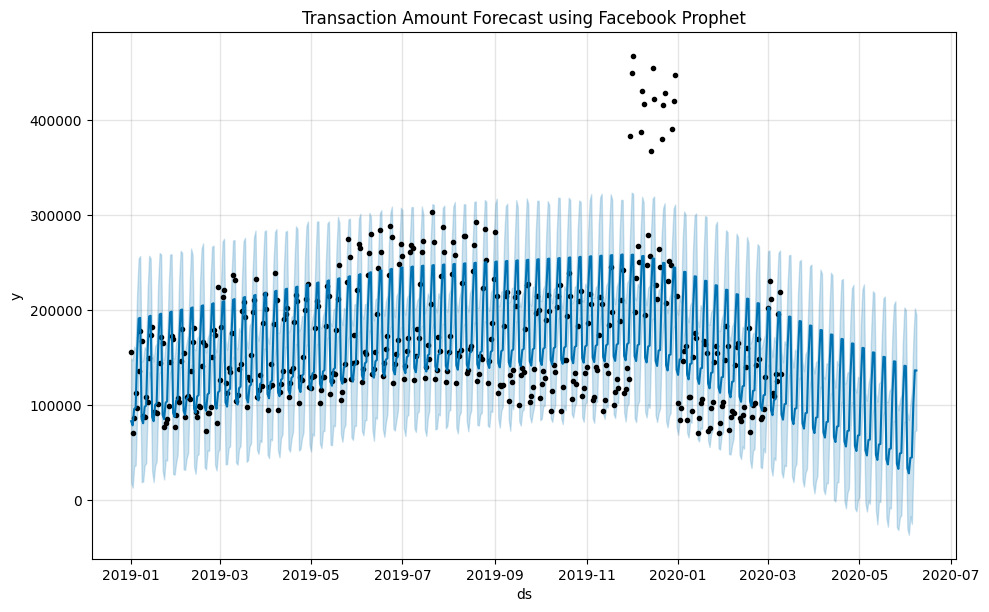

In [15]:
# Plot forecast
model.plot(forecast)
plt.title("Transaction Amount Forecast using Facebook Prophet")
plt.show()